<a href="https://colab.research.google.com/github/Labibbib/Data_Mining-Final_Project-Group_D/blob/main/Final_Project_Group_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS SENTIMEN PADA TWITTER TERHADAP PROGRAM "LAPOR MAS WAPRES"**

**Group D Final Project**

| Nama | NIM | Kelas | Kontribusi |
| -------- | -------- | -------- | -------- |
| Nayla Sekar Ariesty | 11220940000009   | DS 2   | Labelling & Stopword, Preprocessing, Membuat PPT |
| Adinda Nabila Fitri Heryanto | 11220940000030   | DS 2   | Labelling & Stopword, Preprocessing, Membuat video |
| Ibnullabib   | 11220940000037   | DS 2   | Labeling & Stopword, Scraping data, EDA, Visualisasi, Membuat PPT |
  | Syafiqah Marsya Kholiyadi  | 11220940000056   | DS 2   | Labeling & Stopword, EDA, Membuat model, Visualisasi, Membuat PPT |
| Niken Safira     | 11220940000073   | D2 2   | Labeling & Stopword, Preprocessing, Membuat video |


# **PENDAHULUAN**
**KASUS:**

Setelah menentukan topik kelompok yang menarik dan terkini,  tugas anda adalah mengambil data digital dari berbagai platform yang ada, misal youtube, website, atau sumber lainnya. Syarat data yang diambil:

Bukan data yang telah dikumpulkan sebelumnya oleh orang lain, misal unduh dari kaggle atau github.
Wajib data tidak terstruktur (Teks atau Graph).
Setelah itu anda diminta untuk mencari informasi atau insight dari data yang terkumpul.



# **IMPORT MODUL YANG DIPERLUKAN**

In [2]:
#Import Modul yang diperlukan
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# **LOAD DATA**

**Note:**

Data ini kami ambil dari hasil scraping menggunakan modul/algoritma orang lain yang dimana output dari algoritma ini berupa file csv. Berikut sumbernya:

https://helmisatria.com/blog/updated-crawl-data-twitter-x-maret-2024/

Berikut adalah colab bukti bahwa kami mengambil data dari twitter:

https://colab.research.google.com/drive/17LO2jCenCzuMEjRfJ0xh3wDbM3JBUuJo?usp=sharing

In [3]:
#Import Dataset dari GitHub
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/Labibbib/Data_Mining-Final_Project-Group_D/refs/heads/main/twit_data.csv
data = pd.read_csv("data/twit_data.csv", sep=',')
data.head(5)

--2024-12-23 08:07:55--  https://raw.githubusercontent.com/Labibbib/Data_Mining-Final_Project-Group_D/refs/heads/main/twit_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 468929 (458K) [text/plain]
Saving to: ‘data/twit_data.csv’

twit_data.csv       100%[===================>] 457.94K  --.-KB/s    in 0.05s   

2024-12-23 08:07:56 (9.52 MB/s) - ‘data/twit_data.csv’ saved [468929/468929]



,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1859385012640153922,Wed Nov 20 23:55:07 +0000 2024,0,Lo yg super tolol dan goblok...mudah mudah yg ...,1859385012640153922,NaN,NaN,in,NaN,0,0,0,https://x.com/sroso9829/status/185938501264015...,1854542208185352192,sroso9829
1,1859114831837876412,Wed Nov 20 23:32:47 +0000 2024,0,@opposite6892 Cepet Lapor mas wapres fufufafa ...,1859379394181009555,NaN,opposite6892,in,NaN,0,0,0,https://x.com/NajwaBakheet/status/185937939418...,1724502816192884736,NajwaBakheet
2,1859125236979167238,Wed Nov 20 21:07:46 +0000 2024,0,@msaid_didu Sudah lapor belum ke posko lapor m...,1859342898829066688,NaN,msaid_didu,in,NaN,0,0,0,https://x.com/Tedjo05013701/status/18593428988...,1329191428853940224,Tedjo05013701
3,1859121135142793501,Wed Nov 20 20:58:13 +0000 2024,0,@Dennysiregar7 Loe laporkan ke posko lapor mas...,1859340495786529252,NaN,Dennysiregar7,in,NaN,0,0,0,https://x.com/Tedjo05013701/status/18593404957...,1329191428853940224,Tedjo05013701
4,1859325630862721199,Wed Nov 20 19:59:09 +0000 2024,81,Mana yg adili pidanakan jokowi dan keluarganya...,1859325630862721199,https://pbs.twimg.com/ext_tw_video_thumb/18593...,NaN,in,Tolak! Indonesia di komuniskan,2,3,67,https://x.com/ForRezim/status/1859325630862721199,1482600556669460485,ForRezim


# **PEPROCESSING**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      1279 non-null   int64 
 1   created_at               1279 non-null   object
 2   favorite_count           1279 non-null   int64 
 3   full_text                1279 non-null   object
 4   id_str                   1279 non-null   int64 
 5   image_url                384 non-null    object
 6   in_reply_to_screen_name  504 non-null    object
 7   lang                     1279 non-null   object
 8   location                 757 non-null    object
 9   quote_count              1279 non-null   int64 
 10  reply_count              1279 non-null   int64 
 11  retweet_count            1279 non-null   int64 
 12  tweet_url                1279 non-null   object
 13  user_id_str              1279 non-null   int64 
 14  username                 1279 non-null  

In [5]:
# Mengecek apakah ada duplikasi pada data
data.duplicated().sum()

235

In [6]:
# Karena terdapat 235 data yang terduplikasi, maka data duplikatnya dihapus
data = data.drop_duplicates()
data.reset_index(drop=True) # Mereset index setelah duplikasi terhapus

# Mengecek kembali apakah sudah tidak ada data yang terduplikasi
print(data.duplicated().sum())

0


In [7]:
# Mengecek apakah ada data yang null (kosong) pada variabel 'full_text'
data['full_text'].isnull().sum()

0

In [8]:
# Menyimpan data yang sudah tidak ada duplikatnya
data.to_csv('data_no_duplicate.csv',encoding='utf8',index=False)

## **Labeling**

Alasan kami menyimpan filenya dulu karena kami ingin melabeli twitnya

In [9]:
# Load data hasil labeling
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/Labibbib/Data_Mining-Final_Project-Group_D/refs/heads/main/data_no_duplicate_label.csv
data_label = pd.read_csv("data/data_no_duplicate_label.csv", sep=',')
data_label.head(5)

mkdir: cannot create directory ‘data’: File exists
--2024-12-23 08:07:56--  https://raw.githubusercontent.com/Labibbib/Data_Mining-Final_Project-Group_D/refs/heads/main/data_no_duplicate_label.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386951 (378K) [text/plain]
Saving to: ‘data/data_no_duplicate_label.csv’

data_no_duplicate_l 100%[===================>] 377.88K  --.-KB/s    in 0.04s   

2024-12-23 08:07:56 (8.38 MB/s) - ‘data/data_no_duplicate_label.csv’ saved [386951/386951]



,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment
0,1859385012640153922,Wed Nov 20 23:55:07 +0000 2024,0,Lo yg super tolol dan goblok...mudah mudah yg ...,1859385012640153922,NaN,NaN,in,NaN,0,0,0,https://x.com/sroso9829/status/185938501264015...,1854542208185352192,sroso9829,negatif
1,1859114831837876412,Wed Nov 20 23:32:47 +0000 2024,0,@opposite6892 Cepet Lapor mas wapres fufufafa ...,1859379394181009555,NaN,opposite6892,in,NaN,0,0,0,https://x.com/NajwaBakheet/status/185937939418...,1724502816192884736,NajwaBakheet,positif
2,1859125236979167238,Wed Nov 20 21:07:46 +0000 2024,0,@msaid_didu Sudah lapor belum ke posko lapor m...,1859342898829066688,NaN,msaid_didu,in,NaN,0,0,0,https://x.com/Tedjo05013701/status/18593428988...,1329191428853940224,Tedjo05013701,positif
3,1859121135142793501,Wed Nov 20 20:58:13 +0000 2024,0,@Dennysiregar7 Loe laporkan ke posko lapor mas...,1859340495786529252,NaN,Dennysiregar7,in,NaN,0,0,0,https://x.com/Tedjo05013701/status/18593404957...,1329191428853940224,Tedjo05013701,positif
4,1859325630862721199,Wed Nov 20 19:59:09 +0000 2024,81,Mana yg adili pidanakan jokowi dan keluarganya...,1859325630862721199,https://pbs.twimg.com/ext_tw_video_thumb/18593...,NaN,in,Tolak! Indonesia di komuniskan,2,3,67,https://x.com/ForRezim/status/1859325630862721199,1482600556669460485,ForRezim,negatif


In [10]:
# Slice dataset yang diperlukan
df = data_label[['sentiment', 'full_text']]
df.head(5)

,sentiment,full_text
0,negatif,Lo yg super tolol dan goblok...mudah mudah yg ...
1,positif,@opposite6892 Cepet Lapor mas wapres fufufafa ...
2,positif,@msaid_didu Sudah lapor belum ke posko lapor m...
3,positif,@Dennysiregar7 Loe laporkan ke posko lapor mas...
4,negatif,Mana yg adili pidanakan jokowi dan keluarganya...


## **Text Cleaning**

Di sini kami menghapus noise pada twitam. Noise seperti tanda hashtag, orang yang dimention, emoji, URL, tag HTML, angka, spasi yang berlebih, dsb.

In [11]:
# Modul yang diperlukan
import re

In [12]:
def clean_tweet(tweet):
  tweet = re.sub(r'@\w+', '', tweet) # Mengahapus mentions
  tweet = re.sub(r'#', '', tweet) # Mengahapus hashtags (#)
  tweet = re.sub(r'http\S+|www\S+', '', tweet) # Mengahapus URLs
  tweet = re.sub(r'\d+', '', tweet) # Mengahapus angka
  # Mengahapus emoji
  emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F700-\U0001F77F"  # alchemical symbols
                            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                            u"\U00002702-\U000027B0"  # Dingbats
                            u"\U000024C2-\U0001F251"  # Enclosed characters
                            "]+", flags=re.UNICODE)
  tweet = emoji_pattern.sub(r'', tweet)
  tweet = re.sub(r'<.*?>', '', tweet)  # Menghapus tag HTML
  tweet = re.sub(r'[^a-zA-Z\s]+', ' ', tweet) # Mengganti yang bukan alpabet dengan spasi
  tweet = re.sub(r'\s+', ' ', tweet) # Mengubah spasi yang berlebih
  return tweet

def clean_tweets_dataset(tweets_df, text_column):
  tweets_df[f'cleaned_{text_column}'] = tweets_df[text_column].apply(clean_tweet)
  return tweets_df

In [13]:
df = clean_tweets_dataset(df, 'full_text')
df.head(5)

<ipython-input-12-051e6461ced5>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df[f'cleaned_{text_column}'] = tweets_df[text_column].apply(clean_tweet)


,sentiment,full_text,cleaned_full_text
0,negatif,Lo yg super tolol dan goblok...mudah mudah yg ...,Lo yg super tolol dan goblok mudah mudah yg la...
1,positif,@opposite6892 Cepet Lapor mas wapres fufufafa ...,Cepet Lapor mas wapres fufufafa dong gaes
2,positif,@msaid_didu Sudah lapor belum ke posko lapor m...,Sudah lapor belum ke posko lapor mas Wapres i...
3,positif,@Dennysiregar7 Loe laporkan ke posko lapor mas...,Loe laporkan ke posko lapor mas Wapres ditung...
4,negatif,Mana yg adili pidanakan jokowi dan keluarganya...,Mana yg adili pidanakan jokowi dan keluarganya...


## **Case Folding**

Disini kami mengubah semua huruf di dalam text menjadi lowercase, gunanya untuk konsistensi kata dan mengurangi variasi berlebih pada text.

In [14]:
def case_folding(tweet):
  if isinstance(tweet, str):
    lowcase = tweet.lower() # Semua text jadi lowercase
    return lowcase
  else:
    return tweet

# Menyimpan hasil case folding ke kolom baru untuk perbandingan
df['case_folding'] = df['cleaned_full_text'].apply(case_folding)
df.head(5)

<ipython-input-14-23a99bdbee91>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['case_folding'] = df['cleaned_full_text'].apply(case_folding)


,sentiment,full_text,cleaned_full_text,case_folding
0,negatif,Lo yg super tolol dan goblok...mudah mudah yg ...,Lo yg super tolol dan goblok mudah mudah yg la...,lo yg super tolol dan goblok mudah mudah yg la...
1,positif,@opposite6892 Cepet Lapor mas wapres fufufafa ...,Cepet Lapor mas wapres fufufafa dong gaes,cepet lapor mas wapres fufufafa dong gaes
2,positif,@msaid_didu Sudah lapor belum ke posko lapor m...,Sudah lapor belum ke posko lapor mas Wapres i...,sudah lapor belum ke posko lapor mas wapres i...
3,positif,@Dennysiregar7 Loe laporkan ke posko lapor mas...,Loe laporkan ke posko lapor mas Wapres ditung...,loe laporkan ke posko lapor mas wapres ditung...
4,negatif,Mana yg adili pidanakan jokowi dan keluarganya...,Mana yg adili pidanakan jokowi dan keluarganya...,mana yg adili pidanakan jokowi dan keluarganya...


## **Tokenisasi**

Di tokenisasi ini, kami memisahkan kata, simbol, frasa, dll untuk menghindari kompleksitas dalam string asal dan menghindari masalah semantik.

In [15]:
# Modul yang diperlukan
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [16]:
# Fungsi untuk tokenisasi menggunakan modul nltk
def tokenize_tweet(tweet):
    return word_tokenize(tweet)

def tokenize_tweets_dataset(tweets_df, cleaned_text_column):
    tweets_df[f'tokenized'] = tweets_df[cleaned_text_column].apply(tokenize_tweet)
    return tweets_df

df = tokenize_tweets_dataset(df, 'case_folding')
df.head(5)

<ipython-input-16-c65613dd1f0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df[f'tokenized'] = tweets_df[cleaned_text_column].apply(tokenize_tweet)


,sentiment,full_text,cleaned_full_text,case_folding,tokenized
0,negatif,Lo yg super tolol dan goblok...mudah mudah yg ...,Lo yg super tolol dan goblok mudah mudah yg la...,lo yg super tolol dan goblok mudah mudah yg la...,"[lo, yg, super, tolol, dan, goblok, mudah, mud..."
1,positif,@opposite6892 Cepet Lapor mas wapres fufufafa ...,Cepet Lapor mas wapres fufufafa dong gaes,cepet lapor mas wapres fufufafa dong gaes,"[cepet, lapor, mas, wapres, fufufafa, dong, gaes]"
2,positif,@msaid_didu Sudah lapor belum ke posko lapor m...,Sudah lapor belum ke posko lapor mas Wapres i...,sudah lapor belum ke posko lapor mas wapres i...,"[sudah, lapor, belum, ke, posko, lapor, mas, w..."
3,positif,@Dennysiregar7 Loe laporkan ke posko lapor mas...,Loe laporkan ke posko lapor mas Wapres ditung...,loe laporkan ke posko lapor mas wapres ditung...,"[loe, laporkan, ke, posko, lapor, mas, wapres,..."
4,negatif,Mana yg adili pidanakan jokowi dan keluarganya...,Mana yg adili pidanakan jokowi dan keluarganya...,mana yg adili pidanakan jokowi dan keluarganya...,"[mana, yg, adili, pidanakan, jokowi, dan, kelu..."


## Mengatasi Slang

Di sini kami membuat dictionary sendiri ditambah dengan dictionary dari pak Taufik untuk mengatasi slang dan typo yang ada di kolom tokenized

In [17]:
import requests

def add_slang_from_url(url):
    """Fungsi untuk mengambil data dari URL dan mengonversinya menjadi dictionary."""
    response = requests.get(url)
    response.raise_for_status()  # Memastikan permintaan berhasil
    data = response.text
    slang_dict = {}
    for line in data.strip().split("\n"):
        if ":" in line:  # Memastikan format yang valid
            slang, real_word = line.split(":", 1)
            slang_dict[slang.strip()] = real_word.strip()
    return slang_dict

# URL
url1 = 'https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/slang.txt'
url2 = 'https://raw.githubusercontent.com/Labibbib/Data_Mining-Final_Project-Group_D/refs/heads/main/slang_group_D.txt'

# Mendapatkan dictionary dari kedua URL
slang_dict1 = add_slang_from_url(url1)
slang_dict2 = add_slang_from_url(url2)

# Menggabungkan/memperbarui slang_dict1 dengan slang_dict2
slang_dict1.update(slang_dict2)

# Hasil dictionary gabungan
print(slang_dict1)


{'&': 'dan', '1pun': 'satupun', '7an': 'tujuan', '@': 'di', 'Dr': 'dokter', 'Jkt': 'Jakarta', 'Jkw': 'jokowi', 'Napza': 'narkoba psikotropika dan zat adiktif', 'Nasihat': 'nasehat', 'SE': 'Surat Edaran', 'ababil': 'abg labil', 'abis': 'habis', 'acc': 'accord', 'accord': 'sesuai', 'ad': 'ada', 'adl': 'adalah', 'adlah': 'adalah', 'adlh': 'adalah', 'administ': 'administrasi', 'adoh': 'aduh', 'afaik': 'as far as i know', 'agma': 'agama', 'aha': 'tertawa', 'ahaha': 'haha', 'ahiok': 'ahok', 'ahoax': 'ahok', 'ahokncc': 'ahok', 'aing': 'saya', 'aj': 'saja', 'aja': 'saja', 'ajak2': 'ajak-ajak', 'ajep-ajep': 'dunia gemerlap', 'ajj': 'saja', 'ak': 'aku', 'aka': 'dikenal juga sebagai', 'akherat': 'akhirat', 'akhirx': 'akhirnya', 'akika': 'aku', 'akko': 'aku', 'akkoh': 'aku', 'akku': 'aku', 'akn': 'akan', 'aktifis2': 'aktivis-aktivis', 'aktivi': 'aktivis', 'aktivis2': 'aktivis-aktivis', 'akun2': 'akun-akun', 'akuwh': 'aku', 'akyu': 'aku', 'alay': 'norak', 'aleg': 'caleg', 'alih2': 'alih-alih', 'alj

In [18]:
def replace_slang(df, column, slang_dict):
    """Fungsi untuk menggantikan slang dalam kolom token pada DataFrame."""
    def replace_tokens(tokens):
        return [slang_dict.get(token, token) for token in tokens]

    df[column] = df[column].apply(replace_tokens)
    return df

df = replace_slang(df, 'tokenized', slang_dict1)
df.head(5)

<ipython-input-18-06ddc2578ce9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(replace_tokens)


,sentiment,full_text,cleaned_full_text,case_folding,tokenized
0,negatif,Lo yg super tolol dan goblok...mudah mudah yg ...,Lo yg super tolol dan goblok mudah mudah yg la...,lo yg super tolol dan goblok mudah mudah yg la...,"[kamu, yang, super, tolol, dan, bodoh, mudah, ..."
1,positif,@opposite6892 Cepet Lapor mas wapres fufufafa ...,Cepet Lapor mas wapres fufufafa dong gaes,cepet lapor mas wapres fufufafa dong gaes,"[cepat, lapor, mas, wapres, fufufafa, dong, gaes]"
2,positif,@msaid_didu Sudah lapor belum ke posko lapor m...,Sudah lapor belum ke posko lapor mas Wapres i...,sudah lapor belum ke posko lapor mas wapres i...,"[sudah, lapor, belum, kah, posko, lapor, mas, ..."
3,positif,@Dennysiregar7 Loe laporkan ke posko lapor mas...,Loe laporkan ke posko lapor mas Wapres ditung...,loe laporkan ke posko lapor mas wapres ditung...,"[kamu, laporkan, kah, posko, lapor, mas, wapre..."
4,negatif,Mana yg adili pidanakan jokowi dan keluarganya...,Mana yg adili pidanakan jokowi dan keluarganya...,mana yg adili pidanakan jokowi dan keluarganya...,"[mana, yang, adili, pidanakan, jokowi, dan, ke..."


## **Stopword Removal**

Di sini kami menghapus kata-kata umum yang tidak memiliki makna di dalam text. Stopword adalah kata-kata yang ada di dalam text yang sering muncul (dan jarang sekali muncul) dan memiliki sedikit sekali informasi terhadap hal yang ingin dianalisis. Dalam bahasa Indonesia, contoh stopword adalah "aku", "kamu", "yang", "di", "adalah", "ke", dll.

In [19]:
# Import modul yang diperlukan
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
import requests

def fetch_stopwords(url):
    """Fungsi untuk mengambil daftar stopwords dari URL."""
    response = requests.get(url)
    response.raise_for_status()  # Pastikan permintaan berhasil
    stopwords = [line.strip() for line in response.text.strip().split("\n") if line.strip()]
    return stopwords

# URL stopwords
url_stopwords = 'https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/f6fc386b3c4881664ddbbb1e34bb07abde695536/data/stopwords_id.txt'

# Mendapatkan daftar stopwords
stopwords_list = fetch_stopwords(url_stopwords)

In [21]:
stopword_sendiri = custom_stopwords = [
    "loh", "toh", "wow", "radarjabar", "pik", "wkwkwkw",
    "mrt", "mu", "ti", "podiummi", "hahahahahaha", "psn",
    "alamaaaakkj", "wapresri", "cc", "buzz", "f", "dll",
    "deh", "ab", "ka", "sla", "ab", "ecek", "bae",
    "sing", "bojo", "kah","lapor","mas","wapres","program",
    "layan","republik","indonesia","rakyat","presiden","wapres",
    "wakil","jokowi","gibran","rakabuming","masyarakat","adu",
    "republik indonesia", "orang", "layanan", "iya", "pilpres",
    "whatsapp", "normal", "negara", "hasil", "anggap", "nya",
    "nama", "bang", "kemarin", "istana", "lebih baik", "lain lain",
    "buka", "ngadu", "mengadu", "raka", "perintah", "melayani",
    "diadukan", "adukan", "langsung", "jakarta", "dan lain lain",
    "daerah", "jalankan", "dijalankan", "jalan", "pelayanan", "sejalan",
    "laporan", "lapor mas wapres", "laporpak", "pelapor", "laporkan",
    "laporannya", "mlaporkan", "dilaporin", "aduin", "pengaduan", "pengaduannya",
    "mengadukan", "tiarap", "keluarganya", "adili", "pidanakan", "coba", "denganmu",
    "publik", "masuk", "kebijakan", "si", "dicoba", "coba", "mencoba", "terima",
    "milik", "warga", "sih", "gua", "nomor", "pilihan", "membagi", "pakai", "pemerintah",
    "perintah", "sumsel", "palembang", "kepresidenan", "gubernur", "menteri", "bapas"
]
 # Menambahkan stopword
stopwords_list.extend(stopword_sendiri)

In [22]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stopwords_list]

df['stopword_removal'] = df['tokenized'].apply(remove_stopwords)
df.head(5)

<ipython-input-22-d5bdcc85ffb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopword_removal'] = df['tokenized'].apply(remove_stopwords)


,sentiment,full_text,cleaned_full_text,case_folding,tokenized,stopword_removal
0,negatif,Lo yg super tolol dan goblok...mudah mudah yg ...,Lo yg super tolol dan goblok mudah mudah yg la...,lo yg super tolol dan goblok mudah mudah yg la...,"[kamu, yang, super, tolol, dan, bodoh, mudah, ...","[super, tolol, bodoh, mudah, mudah, berdoa, su..."
1,positif,@opposite6892 Cepet Lapor mas wapres fufufafa ...,Cepet Lapor mas wapres fufufafa dong gaes,cepet lapor mas wapres fufufafa dong gaes,"[cepat, lapor, mas, wapres, fufufafa, dong, gaes]","[cepat, fufufafa, gaes]"
2,positif,@msaid_didu Sudah lapor belum ke posko lapor m...,Sudah lapor belum ke posko lapor mas Wapres i...,sudah lapor belum ke posko lapor mas wapres i...,"[sudah, lapor, belum, kah, posko, lapor, mas, ...","[posko, gentle, sambat, monggo, ditunggu]"
3,positif,@Dennysiregar7 Loe laporkan ke posko lapor mas...,Loe laporkan ke posko lapor mas Wapres ditung...,loe laporkan ke posko lapor mas wapres ditung...,"[kamu, laporkan, kah, posko, lapor, mas, wapre...","[posko, ditunggu, penyebabnya, minder, malu, om]"
4,negatif,Mana yg adili pidanakan jokowi dan keluarganya...,Mana yg adili pidanakan jokowi dan keluarganya...,mana yg adili pidanakan jokowi dan keluarganya...,"[mana, yang, adili, pidanakan, jokowi, dan, ke...",[]


## **Stemming**

Di sini kami ingin menyederhanakan kata. Stemming adalah proses dalam pemrosesan teks untuk mengubah kata-kata ke bentuk dasarnya (root word atau stem) dengan menghapus imbuhan (prefix, suffix, infix) atau modifikasi tertentu. Tujuannya adalah menyederhanakan kata sehingga kata-kata yang memiliki makna sama dianggap sebagai satu entitas.

In [23]:
# Install dan Import modul yang diperlukan
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [24]:
factory = StemmerFactory()           # Membuat instance dari StemmerFactory
stemmer = factory.create_stemmer()   # Membuat instance stemmer menggunakan factory

def stem_text(text): # Mendefinisikan fungsi stem_text untuk melakukan stemming pada teks input
    return [stemmer.stem(word) for word in text]

# Mnstemming kata kata
df['stemming'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(10)

<ipython-input-24-3262bba74c66>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemming'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))


,sentiment,full_text,cleaned_full_text,case_folding,tokenized,stopword_removal,stemming
0,negatif,Lo yg super tolol dan goblok...mudah mudah yg ...,Lo yg super tolol dan goblok mudah mudah yg la...,lo yg super tolol dan goblok mudah mudah yg la...,"[kamu, yang, super, tolol, dan, bodoh, mudah, ...","[super, tolol, bodoh, mudah, mudah, berdoa, su...",super tolol bodoh mudah mudah doa surga
1,positif,@opposite6892 Cepet Lapor mas wapres fufufafa ...,Cepet Lapor mas wapres fufufafa dong gaes,cepet lapor mas wapres fufufafa dong gaes,"[cepat, lapor, mas, wapres, fufufafa, dong, gaes]","[cepat, fufufafa, gaes]",cepat fufufafa gaes
2,positif,@msaid_didu Sudah lapor belum ke posko lapor m...,Sudah lapor belum ke posko lapor mas Wapres i...,sudah lapor belum ke posko lapor mas wapres i...,"[sudah, lapor, belum, kah, posko, lapor, mas, ...","[posko, gentle, sambat, monggo, ditunggu]",posko gentle sambat monggo tunggu
3,positif,@Dennysiregar7 Loe laporkan ke posko lapor mas...,Loe laporkan ke posko lapor mas Wapres ditung...,loe laporkan ke posko lapor mas wapres ditung...,"[kamu, laporkan, kah, posko, lapor, mas, wapre...","[posko, ditunggu, penyebabnya, minder, malu, om]",posko tunggu sebab minder malu om
4,negatif,Mana yg adili pidanakan jokowi dan keluarganya...,Mana yg adili pidanakan jokowi dan keluarganya...,mana yg adili pidanakan jokowi dan keluarganya...,"[mana, yang, adili, pidanakan, jokowi, dan, ke...",[],
5,negatif,Mana yg adili pidanakan jokowi dan keluarganya...,Mana yg adili pidanakan jokowi dan keluarganya...,mana yg adili pidanakan jokowi dan keluarganya...,"[mana, yang, adili, pidanakan, jokowi, dan, ke...",[],
6,negatif,@DokterTifa @dedentr @prabowo Mana yg adili pi...,Mana yg adili pidanakan jokowi dan keluargany...,mana yg adili pidanakan jokowi dan keluargany...,"[mana, yang, adili, pidanakan, jokowi, dan, ke...",[],
7,negatif,Mana yg adili pidanakan jokowi dan keluarganya...,Mana yg adili pidanakan jokowi dan keluarganya...,mana yg adili pidanakan jokowi dan keluarganya...,"[mana, yang, adili, pidanakan, jokowi, dan, ke...",[],
8,negatif,@msaid_didu Salam inspirasi saya punya saran u...,Salam inspirasi saya punya saran untuk bapak ...,salam inspirasi saya punya saran untuk bapak ...,"[salam, inspirasi, saya, punya, saran, untuk, ...","[salam, inspirasi, saran, apdesi, efektif, asp...",salam inspirasi saran apdesi efektif aspirasi ...
9,positif,@mrtweepsID Kan ada lapor mas wapres..lapor ke...,Kan ada lapor mas wapres lapor kesana lah kas...,kan ada lapor mas wapres lapor kesana lah kas...,"[akan, ada, lapor, mas, wapres, lapor, kesana,...","[kesana, kasih, paham, makhk]",kesana kasih paham makhk


# **EDA**

In [25]:
# Import modul yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist
import nltk
nltk.download('punkt')
from nltk.util import ngrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
# Tweet yang paling banyak menerima like
data[data['favorite_count']==data['favorite_count'].max()]

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
904,1856544935748767803,Wed Nov 13 03:49:40 +0000 2024,23425,Nah loh.... Salah satu media terkemuka di Asia...,1856544935748767803,https://pbs.twimg.com/media/GcPFxkFasAIgQ7r.jpg,NaN,in,"Cengkareng, Indonesia",480,1069,5031,https://x.com/NenkMonica/status/18565449357487...,1040306964100669440,NenkMonica


In [27]:
# Tweet yang paling banyak di-retweet
data[data['retweet_count']==data['retweet_count'].max()]

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
904,1856544935748767803,Wed Nov 13 03:49:40 +0000 2024,23425,Nah loh.... Salah satu media terkemuka di Asia...,1856544935748767803,https://pbs.twimg.com/media/GcPFxkFasAIgQ7r.jpg,NaN,in,"Cengkareng, Indonesia",480,1069,5031,https://x.com/NenkMonica/status/18565449357487...,1040306964100669440,NenkMonica


In [28]:
# Tweet yang paling banyak di-reply
data[data['reply_count']==data['reply_count'].max()]

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
374,1858404713043312993,Mon Nov 18 06:59:45 +0000 2024,5213,Istana Sebut Nomor WA Lapor Mas Wapres Banyak ...,1858404713043312993,NaN,NaN,in,NaN,1096,1452,477,https://x.com/CNNIndonesia/status/185840471304...,17128975,CNNIndonesia


## **Sentiment Analisis**

<ipython-input-29-e582bcdad686>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set1")


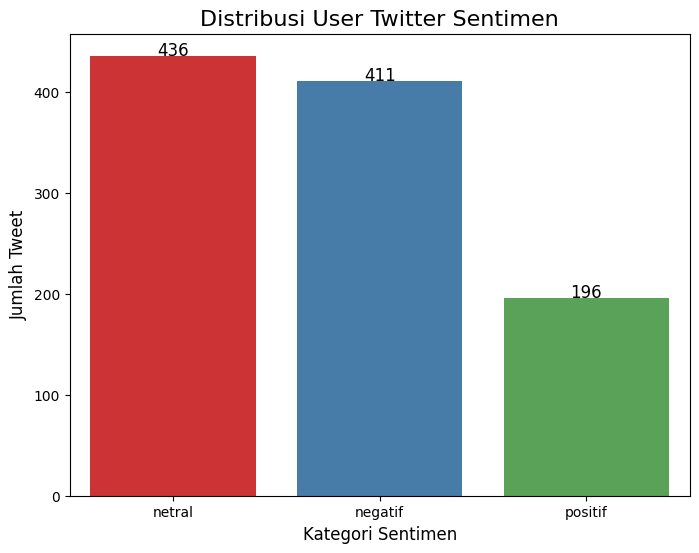

In [29]:
# Menghitung jumlah masing-masing kategori sentimen
sentiment_counts = df['sentiment'].value_counts()

# Membuat plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set1")

# Menambahkan jumlah di atas batang
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=12, color='black')

# Menambahkan judul dan label
plt.title("Distribusi User Twitter Sentimen", fontsize=16)
plt.xlabel("Kategori Sentimen", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menampilkan plot
plt.show()

In [30]:
len(df)

1043

Dari visualisasi di atas, diperoleh bahwa sentiment warga Indonesia terhadap Program "Lapor Mas Wapres" yang dibuat oleh Wakil Presiden Gibran Rakabuming Raka pada tanggal 11 November 2024 didominasi oleh berita-berita atau pernyataan umum terkait program ini. Meskipun demikian, sentimen negatif memiliki jumlah yang lebih banyak dibandingkan dengan sentimen positif yang selisihnya adalah 215 dari 1043 tweet yang kami analisis.

## **WordCloud**

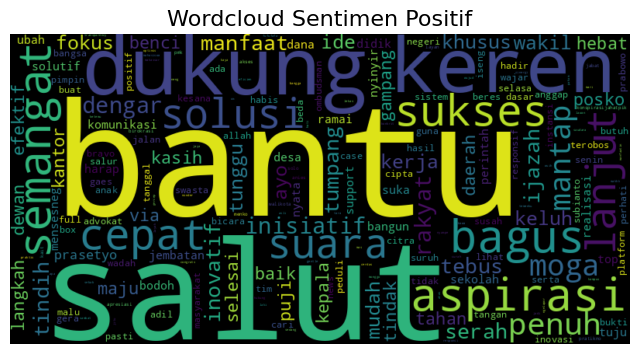

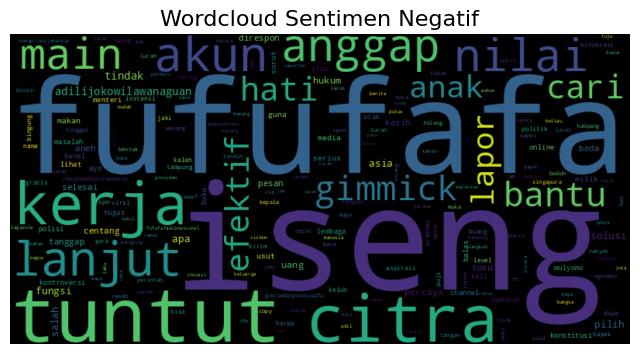

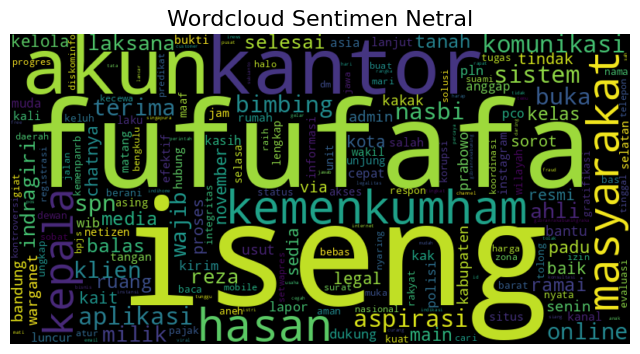

In [31]:
# Pisahkan data berdasarkan kategori sentimen
positif_text = ' '.join(df[df['sentiment'] == 'positif']['stemming'])
negatif_text = ' '.join(df[df['sentiment'] == 'negatif']['stemming'])
netral_text = ' '.join(df[df['sentiment'] == 'netral']['stemming'])

# Fungsi untuk membuat dan menampilkan wordcloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800,
                          height=400,
                          background_color='Black',
                          colormap='viridis',
                          collocations=False).generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Plot wordcloud untuk masing-masing kategori
plot_wordcloud(positif_text, 'Wordcloud Sentimen Positif')
plot_wordcloud(negatif_text, 'Wordcloud Sentimen Negatif')
plot_wordcloud(netral_text, 'Wordcloud Sentimen Netral')

Dapat dilihat dari visualisasi wordcloud di atas bahwa:
- Sentimen Positif: kata kata yang sering muncul adalah "salut", "bantu", "solusi", "dukung", "inovatif", "keren". Kata-kata ini mengindikasikan bahwa sebanyak 196 orang yang membuat tweet terkait program ini mendukung dan memberikan rispek terhadap program yang dibuat wapres kita. Selain itu mereka juga menganggap bahwa program ini adalah solusi yang inovatif untuk membantu aspirasi dan suara rakyat tersampaikan.

- Sentimen Negatif: Kata-kata yang sering muncul adalah "fufufafa", "iseng","citra", "tuntut", "gimmick. Kata-kata ini mengindikasikan bahwa hampir setengah dari 1043 orang yang membuat tweet terkait program "Lapor Mas Wapres" menganggap bahwa ini hanyalah program yang dibuat karena iseng dan hanya gimmick untuk memperbaiki citra diri. Ini didukung oleh fakta bahwa banyak yang mengirim laporan via WhatsApp tetapi ceklis satu yang artinya nomornya tidak aktif. Selain itu, kata yang sering muncul adalah "fufufafa", ini terkait dengan akun viral yang mengolok olok Pak Prabowo.

## **Topic Modelling**

In [32]:
# import modul yang diperlukan
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.2 MB/s eta 0:00:00


In [33]:
vectorizer = CountVectorizer(binary = False, lowercase=True)
vsm = vectorizer.fit_transform(df['stemming'])
# Mengapa tf bukan tfidf?
# Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
# Saran: untuk penelitian VS di Industri.
print(vsm.shape) # Sama

(1043, 2433)


In [34]:
# Dilanjutkan dengan membentuk model LDA-nya
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
n_topics = 3
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(vsm)
lda

LatentDirichletAllocation(n_components=3, random_state=0)

In [35]:
# Melihat Topik-topiknya
vsm_topics = lda.transform(vsm)
print(vsm_topics.shape)
vsm_topics[:10]
# Ukuran kolom = #Topics ==> Dimension Reduction

(1043, 3)


array([[0.04928224, 0.04275231, 0.90796546],
       [0.09868765, 0.33807327, 0.56323908],
       [0.05824957, 0.05658337, 0.88516706],
       [0.05143531, 0.0485125 , 0.90005219],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.54319895, 0.02186016, 0.4349409 ],
       [0.07479073, 0.08692971, 0.83827956]])

100%|██████████| 1043/1043 [00:00<00:00, 116051.02it/s]


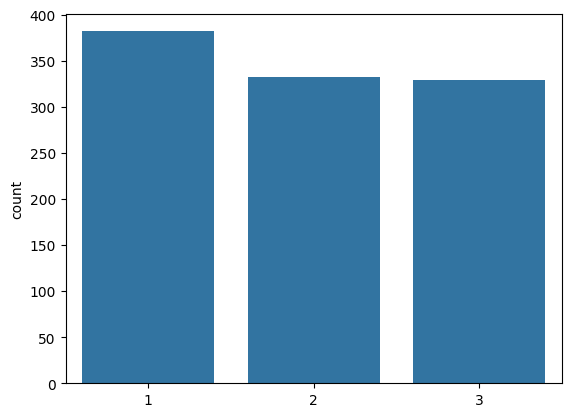

In [36]:
# Seandainya diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
p = sns.countplot(x=doc_topic)

In [37]:
import pyLDAvis, pyLDAvis.lda_model; pyLDAvis.enable_notebook()

pyLDAvis.lda_model.prepare(lda, vsm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.151873 -0.045971       1        1  35.766804
1     -0.123064 -0.088123       2        1  35.234562
0     -0.028808  0.134094       3        1  28.998635, topic_info=             Term       Freq      Total Category  logprob  loglift
880         iseng  83.000000  83.000000  Default  30.0000  30.0000
636      fufufafa  63.000000  63.000000  Default  29.0000  29.0000
165      aspirasi  33.000000  33.000000  Default  28.0000  28.0000
769         hasan  24.000000  24.000000  Default  27.0000  27.0000
1033  kemenkumham  24.000000  24.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
1689       polisi   7.387227  14.326506   Topic3  -5.7271   0.5756
219         bantu   9.063665  39.749302   Topic3  -5.5226  -0.2404
396         cepat   7.449007  19.761851   Topic3  -5.7188   0.2622
2239       tindak   7.340485  23.604725   Topic3  -5.7335   0.0699
2059       solusi   7.053545  20.496275   Topic3  -5.7734   0.1712

[181 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
39        3  0.903348       ah
40        1  0.978086     ahli
63        2  0.122966    akses
63        3  0.860762    akses
70        2  0.726280     akun
...     ...       ...      ...
2351      3  0.217131      via
2366      1  0.858513    wajib
2366      2  0.107314    wajib
2368      1  0.929812    wakil
2400      1  0.859229  wilayah

[216 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

Dari output topic modelling di atas terbentuk 3 Topik berbeda yang berdasarkan distribusi token (persentase kata). Berikut distribusi token dari 3 topik:

1. **Topik 1**: Menunjukkan istilah seperti "aspirasi", "masyarakat" dan "bimbing" yang mengindikasikan adanya diskusi tentang manfaat program bagi masyarakat.

2. **Topik 2**: Istilah seperti "akun", "kantor", dan "selesai" mungkin menunjukkan pembahasan operasional atau keluhan teknis terkait layanan yang kebanyakan disampaikan oleh akun berita.

3. **Topik 3**: Fokus pada istilah seperti "iseng", "gimmick", dan "sistem", menunjukkan percakapan yang mungkin berkaitan dengan skeptisisme atau evaluasi terhadap efektivitas program dan cenderung bernuansa negatif.

## **GRAF**

In [38]:
# Draw the Tweet Graph
import networkx as nx
import pandas as pd, re, operator, numpy as np
from tqdm import tqdm
# Draw the Tweet Graph
G=nx.Graph()
for i, tweet in tqdm(data.iterrows()):
    if tweet.username not in G.nodes():
        G.add_node(tweet.username)
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", tweet['full_text'])
    for mention in mentionS:
        if "." not in mention: #skipping emails
            usr = mention.replace("@",'').strip()
            if usr not in G.nodes():
                G.add_node(usr)
            G.add_edge(tweet.username, usr)
Nn=G.number_of_nodes();Ne=G.number_of_edges()
print('Finished. There are %d nodes and %d edges in the Graph.' %(Nn,Ne))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
1044it [00:00, 2047.85it/s]

Finished. There are 1080 nodes and 725 edges in the Graph.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


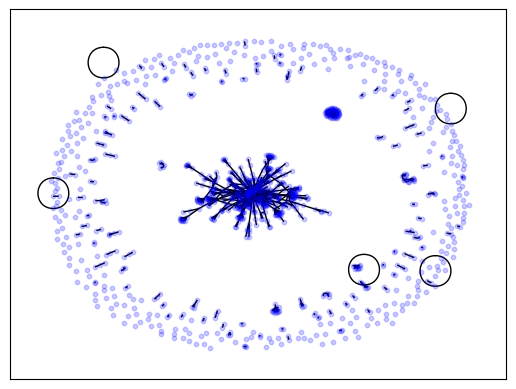

In [39]:
# Latihan dengan layout Graph yang lain
fig = plt.figure()
fig.add_subplot(111)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, alpha=0.2, node_color='blue', node_size=10)
#nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=1)
plt.show()

In [40]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html
N = 10
ranking = nx.degree_centrality(G)
important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
Mstd = 1 # 1 standard Deviation CI
data = np.array([n[1] for n in important_nodes])
out = len(data[abs(data - np.mean(data)) > Mstd * np.std(data)]) # outlier within m stDev interval
if out>N:
    dnodes = [n[0] for n in important_nodes[:N]]
    print('Influencial Users: {0}'.format(str(dnodes)))
else:
    dnodes = [n[0] for n in important_nodes[:out]]
    print('Influencial Users: {0}'.format(str(important_nodes[:out])))
Gt = G.subgraph(dnodes)

Influencial Users: ['gibran', 'sumpanto', 'prabowo', 'NenkMonica', 'Mdy', 'bonapasogit24', 'CNNIndonesia', 'democrazymedia', 'cagubnyinyir2', 'KudaPut46232075']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


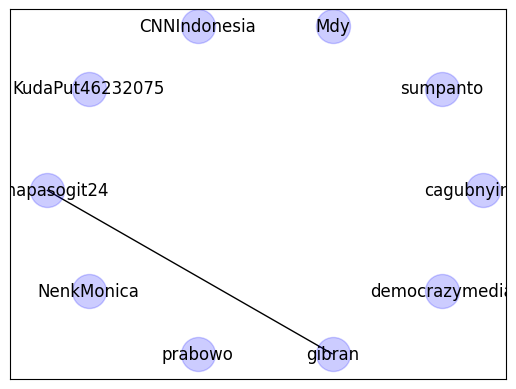

In [41]:
fig = plt.figure()
fig.add_subplot(111)
pos = nx.circular_layout(Gt)
nx.draw_networkx_nodes(Gt, pos, alpha=0.2, node_color='blue', node_size=600)
nx.draw_networkx_labels(Gt, pos)
nx.draw_networkx_edges(Gt, pos, width=1)
plt.show()

berdasarkan graf diatas dapat diketahui:

*   Pengguna yang terhubung menunjukkan bahwa mereka kemungkinan terlibat aktif dalam diskusi tentang program "Lapor Mas Wapres", baik melalui retweet, mention, atau balasan. Sebagai contoh, terdapat interaksi antara akun gibran dengan akun bonapasogit24
*   ukuran dan warna pada node dapat mencerminkan kepentingan peran dalam menyebarkan informasi atau memengaruhi sentimen masyarakat. Seperti akun "CNNIndonesia" mungkin dianggap memiliki banyak koneksi sehingga menunjukkan peran signifikan




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Influencial Users: ['gibran', 'moeliati_S', 'alexander19th', 'Gandawan', 'prabowo', 'susenoklaten', '5lamate', 'BiruBir26073179', 'kuro_nyaa18', 'andri_lan6']


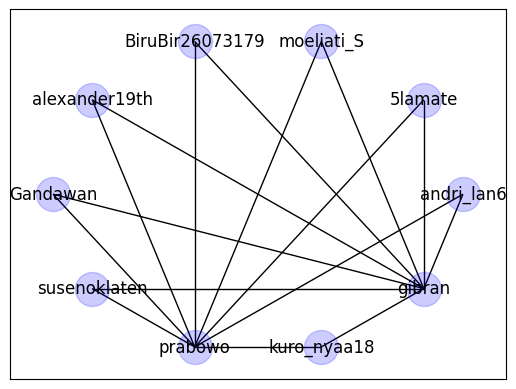

In [42]:
N = 10
ranking = nx.closeness_centrality(G)
important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
Mstd = 1 # 1 standard Deviation CI
data = np.array([n[1] for n in important_nodes])
out = len(data[abs(data - np.mean(data)) > Mstd * np.std(data)]) # outlier within m stDev interval
if out>N:
    dnodes = [n[0] for n in important_nodes[:N]]
    print('Influencial Users: {0}'.format(str(dnodes)))
else:
    dnodes = [n[0] for n in important_nodes[:out]]
    print('Influencial Users: {0}'.format(str(important_nodes[:out])))
Gt = G.subgraph(dnodes)

fig = plt.figure()
fig.add_subplot(111)
pos = nx.circular_layout(Gt)
nx.draw_networkx_nodes(Gt, pos, alpha=0.2, node_color='blue', node_size=600)
nx.draw_networkx_labels(Gt, pos)
nx.draw_networkx_edges(Gt, pos, width=1)
plt.show()

berdasarkan graf diatas, Akun seperti "gibran" dan "prabowo" memiliki banyak koneksi. Ini menunjukkan bahwa akun-akun ini adalah pusat diskusi. Mereka kemungkinan menjadi topik utama, di-mention banyak pengguna, atau terlibat dalam percakapan yang luas.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Influencial Users: ['gibran', 'prabowo', 'NenkMonica', 'Mdy', 'ForRezim', 'Blevensky58', 'ronaldy596', 'bonapasogit24', 'moeliati_S', 'Gandawan']


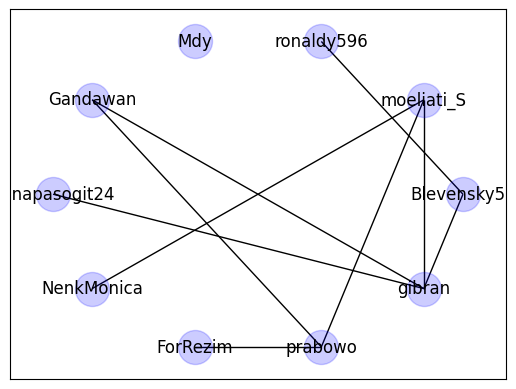

In [43]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html
N = 10
ranking = nx.betweenness_centrality(G)
important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
Mstd = 1 # 1 standard Deviation CI
data = np.array([n[1] for n in important_nodes])
out = len(data[abs(data - np.mean(data)) > Mstd * np.std(data)]) # outlier within m stDev interval
if out>N:
    dnodes = [n[0] for n in important_nodes[:N]]
    print('Influencial Users: {0}'.format(str(dnodes)))
else:
    dnodes = [n[0] for n in important_nodes[:out]]
    print('Influencial Users: {0}'.format(str(important_nodes[:out])))
Gt = G.subgraph(dnodes)

fig = plt.figure()
fig.add_subplot(111)
pos = nx.circular_layout(Gt)
nx.draw_networkx_nodes(Gt, pos, alpha=0.2, node_color='blue', node_size=600)
nx.draw_networkx_labels(Gt, pos)
nx.draw_networkx_edges(Gt, pos, width=1)
plt.show()

berdasarkan graf diatas dapat diketahui bahwa:


*   Akun gibran tampaknya menjadi pusat perhatian dalam diskusi, dengan banyak akun lain yang terhubung ke akun tersebut.
*   Akun prabowo juga tampak sebagai tokoh penting dalam jaringan, meskipun jumlah koneksinya lebih sedikit dibandingkan dengan "gibran".
*   Akun Gandawan dan akun moeliati_S terhubung ke akun-akun penting, menunjukkan bahwa mereka mungkin mendukung atau ikut membahas topik yang sama.
*   Akun seperti Mdy tampak berdiri sendiri (isolasi), yang mungkin berarti mereka terlibat dalam diskusi tetapi tidak banyak berinteraksi dengan akun lain.





In [44]:
# Mengambil data "username" (source) dan "in_reply_to_screen_name" (target) untuk menganalisa graf dengan software gephi
data_label[['username','in_reply_to_screen_name']].to_csv('gephi_graf.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Modeling**

In [45]:

#Import modul yang diperlukan
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
df_label=df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# Membuat DataFrame baru untuk data sentiment negatif (nilai 0)
negatif_df = df_label[df_label['sentiment'] == "negatif"]

# Membuat DataFrame baru untuk data sentiment netral (nilai 1)
netral_df = df_label[df_label['sentiment'] == "netral"]

# Membuat DataFrame baru untuk data sentiment positif (nilai 2)
positif_df = df_label[df_label['sentiment'] == 'positif']

# Hitung jumlah data sentiment netral
netral_count = netral_df.shape[0]

# Lakukan oversampling pada data negatif dan positif
negatif_oversampled = resample(negatif_df, replace=True, n_samples=netral_count, random_state=42)
positif_oversampled = resample(positif_df, replace=True, n_samples=netral_count, random_state=42)

# Gabungkan kembali data yang telah diresample
df_balanced = pd.concat([netral_df, negatif_oversampled, positif_oversampled])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Pisah data train dan test
x = df_balanced['stemming'].fillna('')
y = df_balanced['sentiment'].fillna('')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Latih model Naive Bayes menggunakan fitur TF-IDF
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_vec, y_train)

# Prediksi dan evaluasi model
y_pred = naive_bayes.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-92223576ceaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')


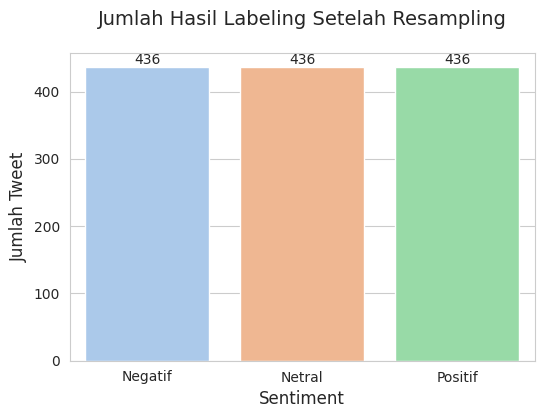

Akurasi Model Naive Bayes:  0.7913486005089059

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.82      0.77      0.79       129
      Netral       0.82      0.69      0.75       140
     Positif       0.75      0.94      0.83       124

    accuracy                           0.79       393
   macro avg       0.80      0.80      0.79       393
weighted avg       0.80      0.79      0.79       393



In [49]:
# Plot barplot untuk jumlah data sentiment yang baru (oversampling)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')
plt.title('Jumlah Hasil Labeling Setelah Resampling', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate([negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]]):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

# Evaluasi Model
print("Akurasi Model Naive Bayes: ", accuracy)
print("\nLaporan Klasifikasi:\n", classification_rep)


In [50]:
# Simpan model dan vectorizer
import joblib
joblib.dump(naive_bayes, 'naive_bayes_model_lapormaswapres.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer_lapormaswapres.pkl')
print('Model Saved')

Model Saved


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


berdasarkan hasil visualisasi menunjukkan hasil klasifikasi sentimen pada tweet terkait program "Lapor Mas Wapres" setelah proses resampling dilakukan untuk menyeimbangkan jumlah data pada setiap kategori sentimen: negatif, netral, dan positif, masing-masing berjumlah 436 tweet. Model menggunakan algoritma Naive Bayes dengan akurasi keseluruhan sebesar 79,13%.

Dari laporan klasifikasi, terlihat bahwa model memiliki performa yang cukup baik secara umum, dengan rata-rata presisi, recall, dan F1-score di angka 0,80 untuk semua kategori. Sentimen positif memiliki kinerja terbaik dengan F1-score 0,83, menunjukkan bahwa model lebih mudah mengenali tweet positif. Sebaliknya, performa pada sentimen netral lebih rendah, terutama pada metrik recall (0,69), yang menunjukkan beberapa tweet netral mungkin diklasifikasikan ke kategori lain.

Hasil ini menunjukkan bahwa model cukup andal untuk menganalisis sentimen publik.

# **Kesimpulan dan Saran**

## **Kesimpulan**

Berdasarkan hasil analisis sentimen pengguna twitter terhadap kebijakan program “Lapor Mas Wapres”:
1. Menujukan bahwa reaksi mereka terhadap program “Lapor Mas Wapres” sangat beragam sebagian besar bersifat netral, diikuti oleh dominasi negatif dibandingkan positif.
2. Program ini diapresiasi oleh sebagian orang sebagai solusi inovatif, tetapi banyak yang skeptis dan menganggapnya hanya sebagai pencitraan, terutama karena isu teknis seperti nomor layanan tidak aktif
3. Program "Lapor Mas Wapres" memiliki potensi untuk menjadi solusi inovatif bagi aspirasi rakyat, tetapi pelaksanaannya perlu ditingkatkan kembali.

## **Saran**

1. Perkuat implementasi nyata dan publikasikan hasil kerja nyata dari program “Lapor Mas Wapres” untuk mengurangi persepsi negatif masyarakat.
2. Membuat tim khusus yang bertugas dalam melayani laporan aspirasi atau keluhan masyarakat.
3. Membuat aplikasi khusus untuk program “Lapor Mas Wapres” karena banyaknya keluhan masyarakat mengenai pesan whatsapp laporan keluhannya yang tidak terbaca.